In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math, copy

In [2]:
X_train = np.array([
    [2104, 5, 1, 45],
    [1416, 3, 2, 40],
    [852, 2, 1, 35],
    [1940, 4, 1, 30],
    [1550, 3, 2, 20],
    [1427, 3, 2, 25],
    [1380, 3, 2, 40],
    [1750, 4, 2, 30],
    [1650, 3, 2, 18],
    [1200, 2, 1, 22]
])
y_train = np.array([460, 232, 178, 315, 250, 240, 275, 310, 290, 220])
print(f"x_train shape: {X_train.shape}\n {X_train} \n y_train shape: {y_train.shape}\n {y_train}")

x_train shape: (10, 4)
 [[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]
 [1940    4    1   30]
 [1550    3    2   20]
 [1427    3    2   25]
 [1380    3    2   40]
 [1750    4    2   30]
 [1650    3    2   18]
 [1200    2    1   22]] 
 y_train shape: (10,)
 [460 232 178 315 250 240 275 310 290 220]


In [3]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape},\n {w_init}\n b_init type: {type(b_init)}")

w_init shape: (4,),
 [  0.39133535  18.75376741 -53.36032453 -26.42131618]
 b_init type: <class 'float'>


In [4]:
def predict(x, w, b):
    return np.dot(w, x)+b

In [5]:
f_wb = predict(X_train[0], w_init, b_init)
print(f"prediction: {f_wb}")

prediction: 459.9999976194082


In [6]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    
    for i in range(m):
        f_wb_i = predict(x[i], w, b)
        cost+=(f_wb_i-y[i])**2
    return cost/(2*m)

In [7]:
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 68330.15347092952


In [8]:
def compute_gradient(x, y, w, b):
    m, n = x.shape
    dj_dw, db_dw = np.zeros((n,)), 0
    
    for i in range(m):
        err = (np.dot(x[i], w)+b)-y[i]
        for j in range(n):
            dj_dw+=err*x[i, j]
        db_dw+=err
    dj_dw/=m
    db_dw/=m
    return dj_dw, db_dw

In [9]:
tmp_dj_dw, tmp_dj_db = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: 274.49647568840817
dj_dw at initial w,b: 
 [444680.7625248 444680.7625248 444680.7625248 444680.7625248]


In [10]:
def generate_polynomial_features(X, degree):
    m, n = X.shape
    X_poly = X
    for d in range(2, degree + 1):
        X_d = np.power(X, d)  
        X_poly = np.hstack((X_poly, X_d))  
    return X_poly

In [11]:
def zscore_normlize_features(X):
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)

In [12]:

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost every iteration
        cost = cost_function(X, y, w, b)  # Ensure this returns a scalar value
        if i < 100000:
            J_history.append(cost)
        
        # Print the cost at intervals
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {cost:8.2f}")
    
    return w, b, J_history


In [13]:

iterations = 19999999
alpha = 4.0e-7
degree = 2
# X_norm, X_mu, X_sigma = zscore_normlize_features(X_train)
# X_train[0] = X_norm[0]
X_poly = generate_polynomial_features(X_train, degree)

X_norm, X_mu, X_sigma = zscore_normlize_features(X_poly)
y_norm, y_mu, y_sigma = zscore_normlize_features(y_train)
initial_w = np.zeros(X_norm.shape[1])
initial_b = 0.
w_final, b_final, J_hist = gradient_descent(X_norm, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_norm.shape
for i in range(m):
    print(f"prediction: {predict(X_norm[i], w_final, b_final)}, target value: {y_norm[i]}")

Iteration    0: Cost 41032.83
Iteration 2000000: Cost  8578.22
Iteration 4000000: Cost  2396.39
Iteration 6000000: Cost  1148.30
Iteration 8000000: Cost   896.32
Iteration 10000000: Cost   845.44
Iteration 12000000: Cost   835.17
Iteration 14000000: Cost   833.09
Iteration 16000000: Cost   832.68
Iteration 18000000: Cost   832.59
b,w found by gradient descent: 276.91,[12.01680347 12.01680347 12.01680347 12.01680347 12.01680347 12.01680347
 12.01680347 12.01680347] 
prediction: 385.1189165138389, target value: 2.505016702411067
prediction: 306.5230509814404, target value: -0.6159877137076394
prediction: 184.1820879518645, target value: -1.3551729701568067
prediction: 295.1475055050694, target value: 0.5201674026864511
prediction: 262.57420117122746, target value: -0.36959262822458366
prediction: 265.70311255827045, target value: -0.5064787868262813
prediction: 304.0942997264384, target value: -0.02737723172033953
prediction: 329.41829365667155, target value: 0.45172432338560226
predicti

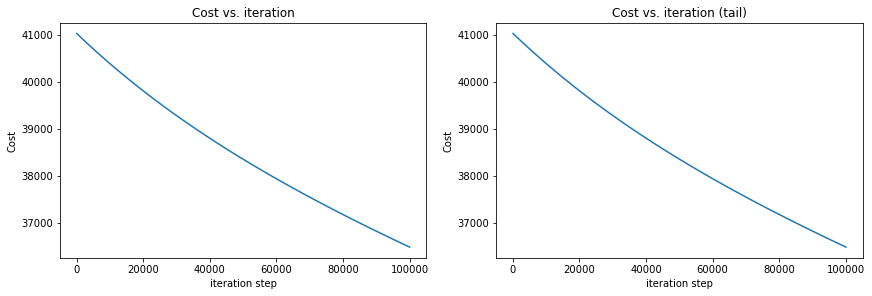

In [14]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

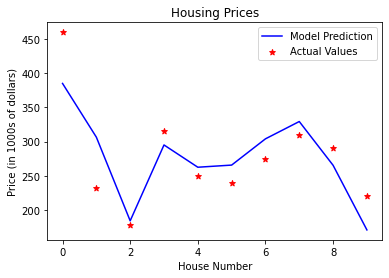

In [15]:
tmp_f_wb = [predict(X_norm[i], w_final, b_final) for i in range(len(X_norm))]


plt.plot(range(len(X_norm)), tmp_f_wb, c='b', label='Model Prediction') 
plt.scatter(range(len(X_norm)), y_train, marker='*', c='r', label='Actual Values')

plt.title("Housing Prices")
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('House Number')  
plt.legend()


plt.show()
